PREPROCESAMIENTO DE DATOS

In [1]:
import pandas as pd
import numpy as np
import collections as cols
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Cargar el archivo CSV
file_path = 'databases/Base de datos para desarrollo v2.csv'
df = pd.read_csv(file_path)
print(df)
print(df.columns)

/tmp/ipykernel_52862/2681613831.py:8: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


        var001       var002              var005 _temperatura_cat   _pulso_cat  \
0            1  U0003670130  01jan2021 00:27:00           Normal       Normal   
1            2  U0003670132  01jan2021 00:29:00           Normal       Normal   
2            3  U0003670154  01jan2021 01:21:00           Normal       Normal   
3            4  U0003670170  01jan2021 02:02:00           Fiebre  Taquicardia   
4            5  U0003670177  01jan2021 02:31:00           Normal       Normal   
...        ...          ...                 ...              ...          ...   
116565  238743  U0005201899  31dec2023 21:04:59           Normal       Normal   
116566  238745  U0005201918  31dec2023 21:45:00           Normal       Normal   
116567  238746  U0005201934  31dec2023 22:12:59           Normal       Normal   
116568  238747  U0005201936  31dec2023 22:17:00           Normal       Normal   
116569  238749  U0005201969  31dec2023 23:28:00           Normal       Normal   

               _pas_cat    

In [2]:
# Paso 1: Eliminar las columnas no útiles y vacíos

df_cleaned = df[['__temperatura','__pulso','__pas','__pad','__sat02', '__categ_fin']].copy()
print(df_cleaned)

# Eliminar filas con valores NaN en cualquier columna

# Verificar la cantidad de filas totales
print(f"Número de filas antes de eliminar NaN: {len(df_cleaned)}")
df_cleaned = df_cleaned.dropna()

# Verificar la cantidad de filas restantes
print(f"Número de filas después de eliminar NaN: {len(df_cleaned)}")
print(df_cleaned)

        __temperatura __pulso __pas  __pad __sat02 __categ_fin
0           35.799999      85   174   87.0      98          C4
1           36.500000      87   118   82.0      99          C4
2           35.700001      93   159   99.0     100          C4
3           38.799999     159   NaN    NaN     100          C3
4           36.299999      83   NaN    NaN      96          C4
...               ...     ...   ...    ...     ...         ...
116565            NaN      89   119   63.0      99          C4
116566            NaN     100   127   68.0      99          C3
116567            NaN      72   135   73.0      98          C4
116568            NaN      80   139   68.0      99          C4
116569            NaN      85   154   92.0      99          C4

[116570 rows x 6 columns]
Número de filas antes de eliminar NaN: 116570
Número de filas después de eliminar NaN: 84076
        __temperatura __pulso __pas  __pad __sat02 __categ_fin
0           35.799999      85   174   87.0      98          C

In [3]:
# Paso 2: 

# Convertir las columnas que se encuentran como objeto a numéricas
# Columnas a convertir
columns_to_convert = ['__pas', '__pulso', '__sat02']

# Convertir las columnas a float64
for column in columns_to_convert:
    df_cleaned[column] = pd.to_numeric(df_cleaned[column], errors='coerce').astype('float64')


# Convertir las columnas categóricas a valores numéricos usando Label Encoding
print(df_cleaned['__categ_fin'].unique())

# Crear una copia del DataFrame para almacenar los mapeos
category_mappings = {}

label_encoders = {}
for column in ['__categ_fin']:
    le = LabelEncoder()
    df_cleaned[column] = le.fit_transform(df_cleaned[column].astype(str)) + 1
    df_cleaned[column] = df_cleaned[column].astype(float)
    label_encoders[column] = le
    
    category_mappings[column] = pd.DataFrame({
        'Categórico': le.classes_,
        'Numérico': range(1, len(le.classes_) + 1)
    })

print(df_cleaned)

print("\nMapeo para '__categ_fin':")
print(category_mappings['__categ_fin'])




['C4' 'C2' 'C5' 'C3' 'C1']
        __temperatura  __pulso  __pas  __pad  __sat02  __categ_fin
0           35.799999     85.0  174.0   87.0     98.0          4.0
1           36.500000     87.0  118.0   82.0     99.0          4.0
2           35.700001     93.0  159.0   99.0    100.0          4.0
6           36.599998     76.0  150.0   71.0     95.0          2.0
7           36.599998     72.0  115.0   77.0     98.0          5.0
...               ...      ...    ...    ...      ...          ...
116209      36.000000     54.0  128.0   66.0     99.0          5.0
116210      36.200001     64.0  125.0   85.0    100.0          5.0
116211      36.200001     61.0  190.0   86.0     99.0          3.0
116212      36.200001     83.0  112.0   55.0     98.0          5.0
116213      36.099998     64.0  119.0   72.0     97.0          4.0

[84076 rows x 6 columns]

Mapeo para '__categ_fin':
  Categórico  Numérico
0         C1         1
1         C2         2
2         C3         3
3         C4         4
4

Counter({5.0: 34581, 4.0: 30387, 3.0: 13522, 2.0: 5365, 1.0: 221})
[4.0, 2.0, 5.0, 3.0, 1.0]
[30387, 5365, 34581, 13522, 221]


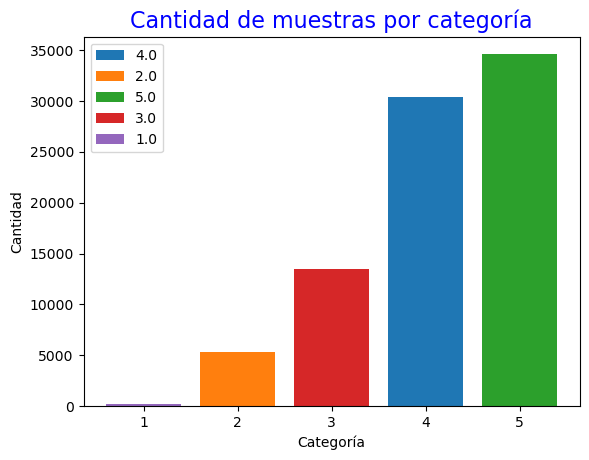

In [4]:
import matplotlib.pyplot as plt
from pylab import rcParams

count_cat = cols.Counter(df_cleaned["__categ_fin"])
print(count_cat)

#Obtenemos los elementos por cada genero y su cantidad de muestras
category = list(count_cat.keys())
print(category)
cat_size = list(count_cat.values())
print(cat_size)


#Fuente
font = {'family': 'sans-serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 16,
        }

plt.title("Cantidad de muestras por categoría", fontdict=font)
plt.xlabel("Categoría")
plt.ylabel("Cantidad")

for i in range(len(cat_size)):
  plt.bar(category[i], cat_size[i], label=category[i])

plt.legend()
plt.show()


In [5]:
# ordenar la base de datos en referencia a categorización
print("Datos ordenada por Categoría")
sorted_df_cat = df_cleaned.sort_values('__categ_fin')
print(sorted_df_cat)

Datos ordenada por Categoría
        __temperatura  __pulso  __pas  __pad  __sat02  __categ_fin
103163      36.099998    115.0  116.0   81.0    100.0          1.0
101839      35.200001    165.0  147.0   94.0     67.0          1.0
17942       35.799999     55.0  116.0   75.0     96.0          1.0
91728       36.200001    131.0  149.0  112.0     91.0          1.0
62884       36.000000     54.0  100.0   46.0     97.0          1.0
...               ...      ...    ...    ...      ...          ...
74656       36.400002     90.0  124.0   86.0    100.0          5.0
30750       36.500000     82.0  105.0   69.0    100.0          5.0
30749       36.200001     63.0  130.0   86.0     99.0          5.0
30761       36.500000     99.0  116.0   81.0     99.0          5.0
53962       36.000000    100.0  119.0   71.0     99.0          5.0

[84076 rows x 6 columns]


In [6]:
# Separamos el conjunto de datos Categoría
categoria_counts_cat = sorted_df_cat['__categ_fin'].value_counts().sort_index()

# Mostrar los resultados
print(categoria_counts_cat)

# Crear un DataFrame con el inicio y fin de cada categoría
# Resetear el índice si es necesario
sorted_df_cat = sorted_df_cat.reset_index(drop=True)
category_ranges_cat = sorted_df_cat.groupby('__categ_fin').apply(
    lambda group: pd.Series({
        'Inicio': group.index.min(),
        'Fin': group.index.max()
    })
).reset_index()

# Mostrar los resultados
category_ranges_cat.columns = ['Categoría', 'Inicio', 'Fin']
print(category_ranges_cat)




__categ_fin
1.0      221
2.0     5365
3.0    13522
4.0    30387
5.0    34581
Name: count, dtype: int64
   Categoría  Inicio    Fin
0        1.0       0    220
1        2.0     221   5585
2        3.0    5586  19107
3        4.0   19108  49494
4        5.0   49495  84075


In [7]:
# 1: 221 | 2: 5365 | 3: 13522 | 4: 30387 | 5: 34581
first_group_cat = sorted_df_cat[0:19107]
second_group_cat = sorted_df_cat[19108:49494]
third_group_cat = sorted_df_cat[49495:len(sorted_df_cat['__categ_fin'])]

print("--- FIRST GROUP ---")
print(first_group_cat)
print("--- SECOND GROUP ---")
print(second_group_cat)
print("--- THIRD GROUP ---")
print(third_group_cat)

--- FIRST GROUP ---
       __temperatura  __pulso  __pas  __pad  __sat02  __categ_fin
0          36.099998    115.0  116.0   81.0    100.0          1.0
1          35.200001    165.0  147.0   94.0     67.0          1.0
2          35.799999     55.0  116.0   75.0     96.0          1.0
3          36.200001    131.0  149.0  112.0     91.0          1.0
4          36.000000     54.0  100.0   46.0     97.0          1.0
...              ...      ...    ...    ...      ...          ...
19102      36.000000     84.0  134.0  100.0    100.0          3.0
19103      36.099998    102.0  187.0  134.0     96.0          3.0
19104      36.000000     82.0  145.0   68.0     98.0          3.0
19105      36.200001     92.0  180.0   76.0     99.0          3.0
19106      36.400002    101.0  114.0   74.0    100.0          3.0

[19107 rows x 6 columns]
--- SECOND GROUP ---
       __temperatura  __pulso  __pas  __pad  __sat02  __categ_fin
19108      36.000000     90.0  127.0   77.0     99.0          4.0
19109    

In [8]:
first_group_cat_tmp = first_group_cat
first_group_cat_tmp['__categ_fin'] = 3.0
print("First Group")
print(first_group_cat_tmp)
second_group_cat_tmp = second_group_cat
second_group_cat_tmp['__categ_fin'] = 4.0
print("Second Group")
print(second_group_cat_tmp)
third_group_cat_tmp = third_group_cat
third_group_cat_tmp['__categ_fin'] = 5.0
print("Third Group")
print(third_group_cat_tmp)
nuevo_grupo_cat = pd.concat([first_group_cat_tmp, second_group_cat, third_group_cat], ignore_index=True)
print(nuevo_grupo_cat)

First Group
       __temperatura  __pulso  __pas  __pad  __sat02  __categ_fin
0          36.099998    115.0  116.0   81.0    100.0          3.0
1          35.200001    165.0  147.0   94.0     67.0          3.0
2          35.799999     55.0  116.0   75.0     96.0          3.0
3          36.200001    131.0  149.0  112.0     91.0          3.0
4          36.000000     54.0  100.0   46.0     97.0          3.0
...              ...      ...    ...    ...      ...          ...
19102      36.000000     84.0  134.0  100.0    100.0          3.0
19103      36.099998    102.0  187.0  134.0     96.0          3.0
19104      36.000000     82.0  145.0   68.0     98.0          3.0
19105      36.200001     92.0  180.0   76.0     99.0          3.0
19106      36.400002    101.0  114.0   74.0    100.0          3.0

[19107 rows x 6 columns]
Second Group
       __temperatura  __pulso  __pas  __pad  __sat02  __categ_fin
19108      36.000000     90.0  127.0   77.0     99.0          4.0
19109      36.000000     

/tmp/ipykernel_52862/3681256086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_group_cat_tmp['__categ_fin'] = 3.0
/tmp/ipykernel_52862/3681256086.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  second_group_cat_tmp['__categ_fin'] = 4.0
/tmp/ipykernel_52862/3681256086.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

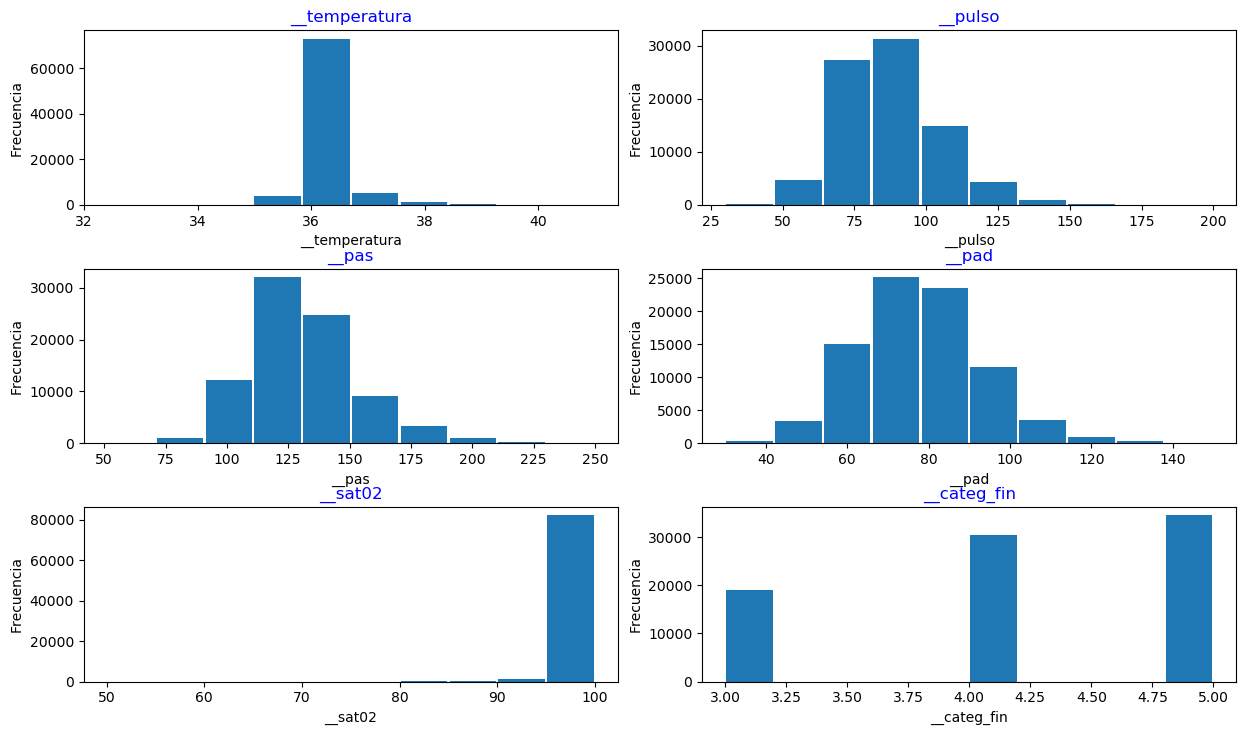

In [9]:
# Histogramas Categoria Nuevo
# First Group
font2 = {'family': 'sans-serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 14,
        }

pos = 1
for col_name in nuevo_grupo_cat.columns[0:6]:
  plt.subplot(4, 2, pos)
  plt.hist(nuevo_grupo_cat[col_name], bins=10, rwidth=0.95)
  plt.title('Histograma de' + col_name, fontdict=font2)
  plt.xlabel(col_name)
  plt.ylabel('Frecuencia')
  plt.title(col_name)

  pos = pos + 1

plt.tight_layout(pad=1.8, w_pad=0.5, h_pad=0, rect=(0,0,2,2))

plt.show()

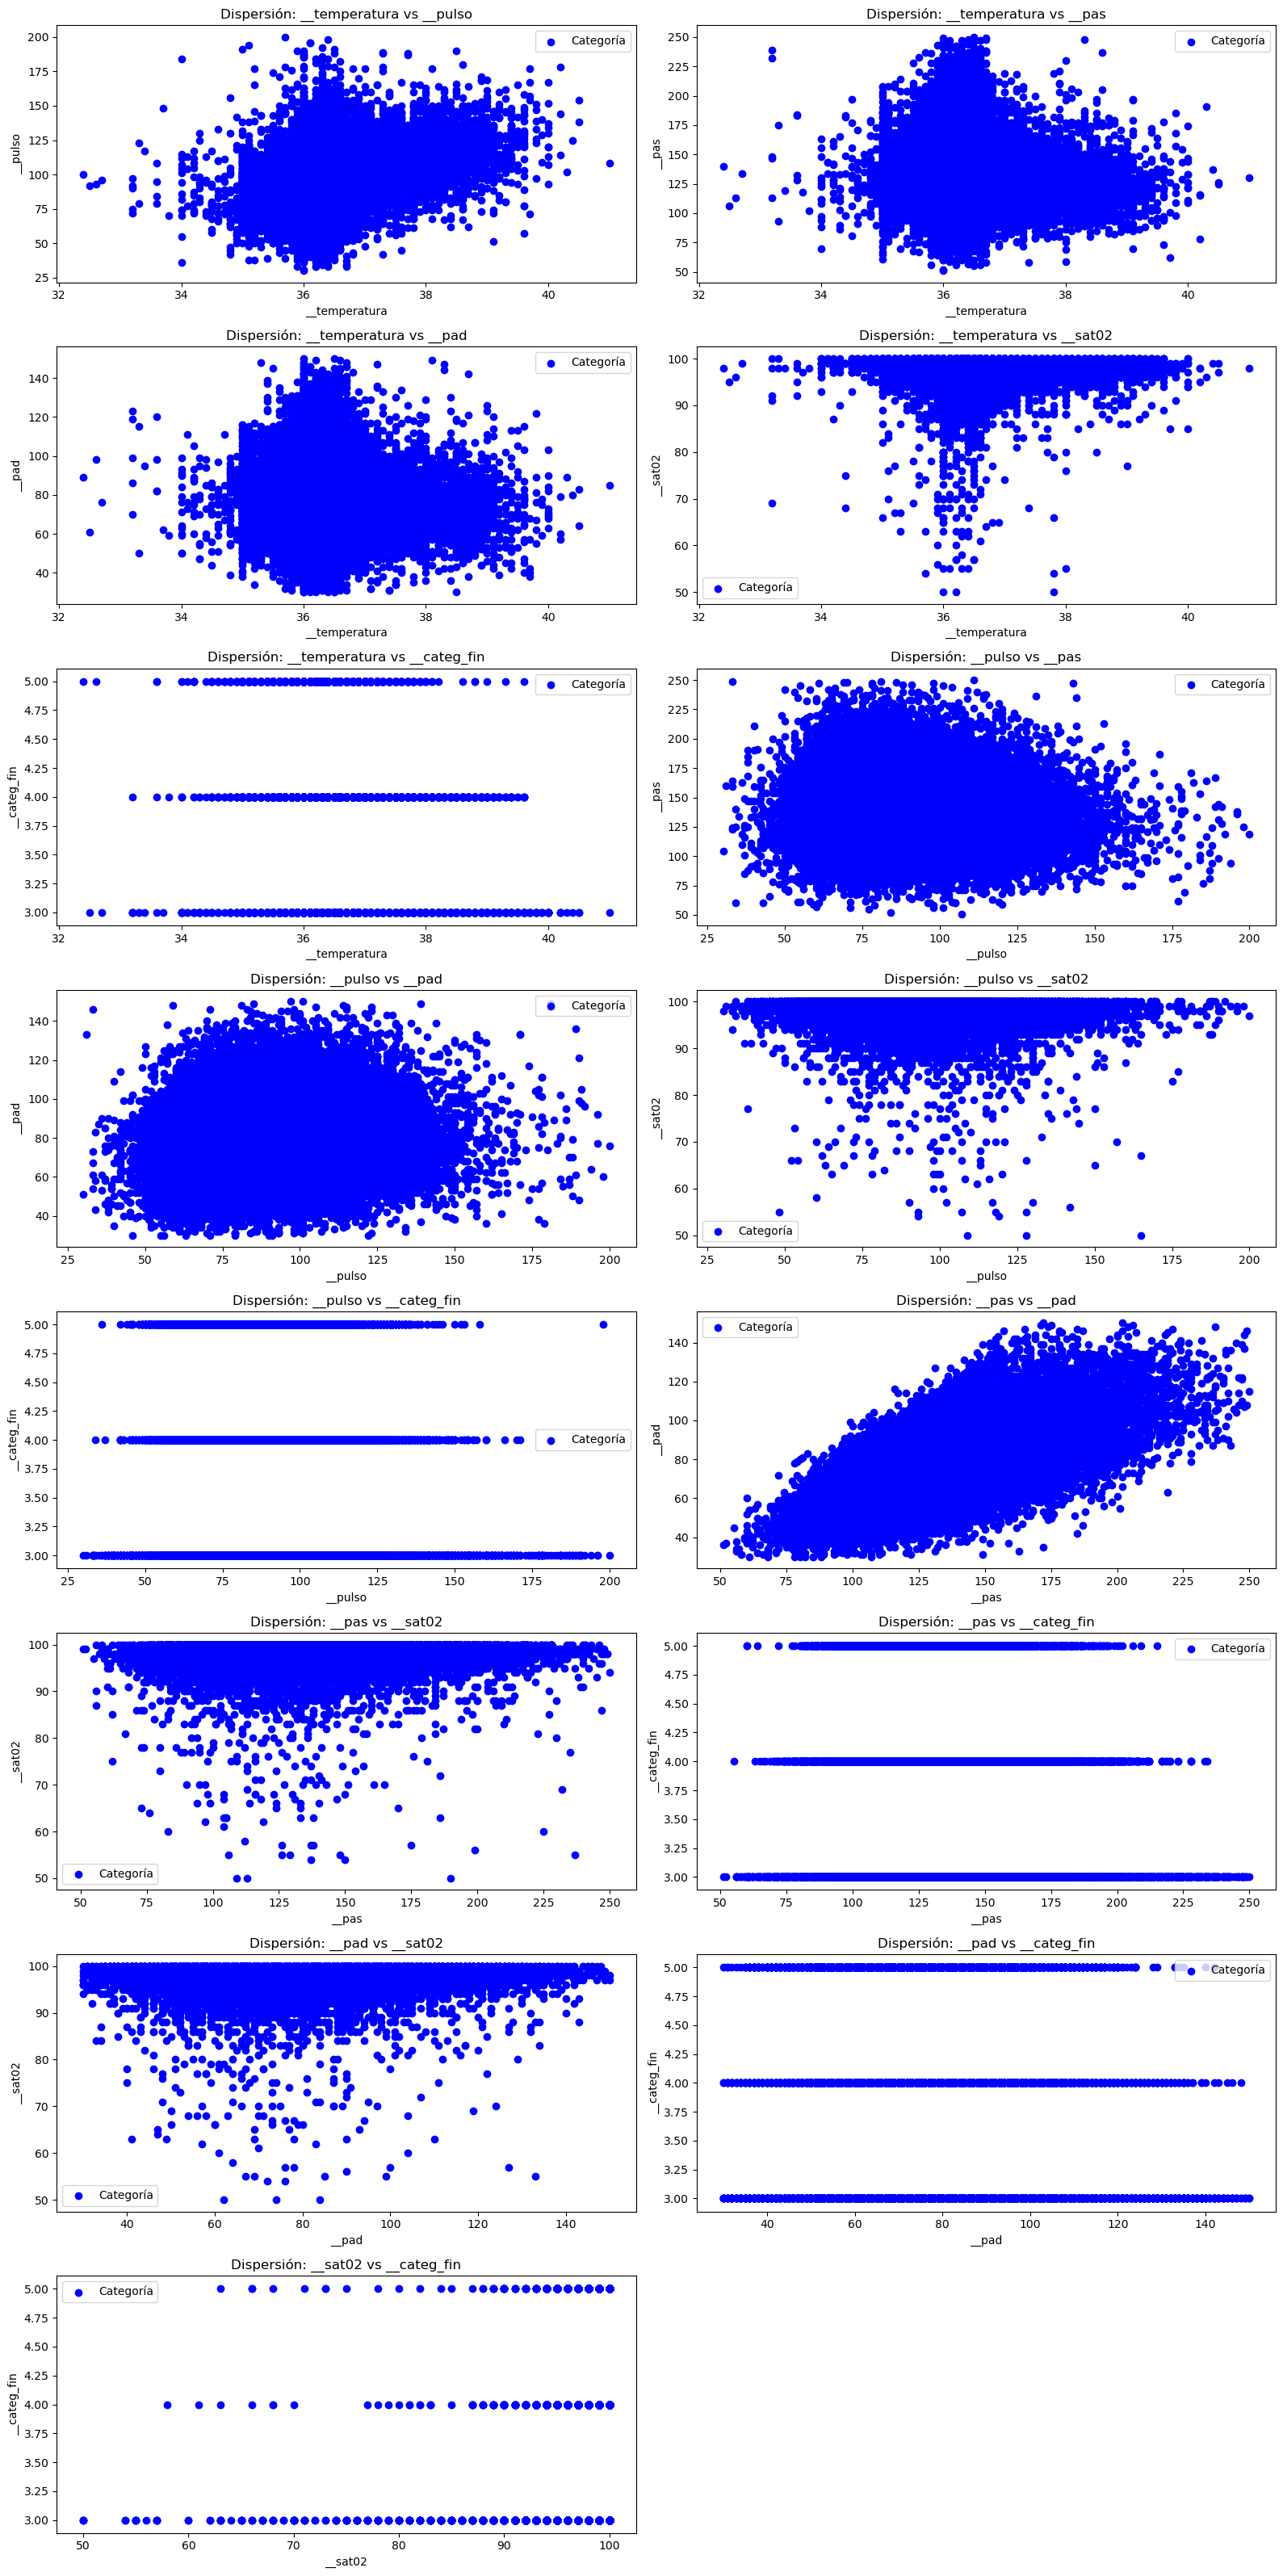

In [10]:
# Diagrama de dispersión para Categoria
from itertools import combinations

# Columnas seleccionadas para los diagramas
columns = ['__temperatura', '__pulso', '__pas', '__pad', '__sat02', '__categ_fin']


# Generar combinaciones de pares de columnas
pairs = list(combinations(columns, 2))

# Determinar el número de filas y columnas en la cuadrícula
n_cols = 2
n_rows = (len(pairs) + n_cols - 1) // n_cols  # Redondear hacia arriba


#First Group

# Crear la cuadrícula de subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
axs = axs.flatten()  # Asegurar acceso como una lista lineal

# Crear diagramas de dispersión para cada par de columnas
for idx, (col_x, col_y) in enumerate(pairs):
    ax = axs[idx]
    ax.scatter(nuevo_grupo_cat[col_x], nuevo_grupo_cat[col_y], marker='o', color='blue', label='Categoría')
    ax.set_title(f"Dispersión: {col_x} vs {col_y}")
    ax.set_xlabel(col_x)
    ax.set_ylabel(col_y)
    ax.legend()

# Eliminar los subplots vacíos si hay más espacios que pares de columnas
for idx in range(len(pairs), len(axs)):
    fig.delaxes(axs[idx])

# Ajustar espacio entre subplots
fig.tight_layout()
plt.show()

In [11]:
# Extrae la columna de Destino
df_output_1_cat = nuevo_grupo_cat['__categ_fin'].copy()
df_cleaned_1_cat = nuevo_grupo_cat.drop(['__categ_fin'],axis=1)

print(df_output_1_cat)
print(df_cleaned_1_cat)

0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
84069    5.0
84070    5.0
84071    5.0
84072    5.0
84073    5.0
Name: __categ_fin, Length: 84074, dtype: float64
       __temperatura  __pulso  __pas  __pad  __sat02
0          36.099998    115.0  116.0   81.0    100.0
1          35.200001    165.0  147.0   94.0     67.0
2          35.799999     55.0  116.0   75.0     96.0
3          36.200001    131.0  149.0  112.0     91.0
4          36.000000     54.0  100.0   46.0     97.0
...              ...      ...    ...    ...      ...
84069      36.400002     90.0  124.0   86.0    100.0
84070      36.500000     82.0  105.0   69.0    100.0
84071      36.200001     63.0  130.0   86.0     99.0
84072      36.500000     99.0  116.0   81.0     99.0
84073      36.000000    100.0  119.0   71.0     99.0

[84074 rows x 5 columns]


In [12]:
# Paso 4: Escalar los datos para que tengan una media de 0 y una desviación estándar de 1
scaler = StandardScaler()
#numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
colums_to_scale = nuevo_grupo_cat[['__temperatura','__pulso','__pas','__pad','__sat02']].columns
#df_cleaned[numeric_columns] = scaler.fit_transform(df_cleaned[numeric_columns])

nuevo_grupo_cat_fit = nuevo_grupo_cat
nuevo_grupo_cat_fit[colums_to_scale] = scaler.fit_transform(nuevo_grupo_cat[colums_to_scale])

print(nuevo_grupo_cat_fit)

       __temperatura   __pulso     __pas     __pad    __sat02  __categ_fin
0          -0.498760  1.635570 -0.675370  0.247632   0.845219          3.0
1          -2.546801  4.557570  0.702409  1.106169 -15.832548          3.0
2          -1.181440 -1.870831 -0.675370 -0.148616  -1.176329          3.0
3          -0.271192  2.570610  0.791298  2.294914  -3.703263          3.0
4          -0.726316 -1.929271 -1.386482 -2.063815  -0.670942          3.0
...              ...       ...       ...       ...        ...          ...
84069       0.183932  0.174569 -0.319814  0.577839   0.845219          5.0
84070       0.411488 -0.292951 -1.164260 -0.544864   0.845219          5.0
84071      -0.271192 -1.403311 -0.053147  0.577839   0.339832          5.0
84072       0.411488  0.700529 -0.675370  0.247632   0.339832          5.0
84073      -0.726316  0.758969 -0.542037 -0.412782   0.339832          5.0

[84074 rows x 6 columns]


In [13]:
# Exportar el DataFrame resultante a un archivo CSV
nuevo_grupo_cat_fit['__categ_fin'] = df_output_1_cat
output_file_path = 'databases/Base de datos para desarrollo v2_cat(preprocesada).csv'
nuevo_grupo_cat_fit.to_csv(output_file_path, index=False)

print(f"El archivo preprocesado se ha guardado en {output_file_path}")

El archivo preprocesado se ha guardado en databases/Base de datos para desarrollo v2_cat(preprocesada).csv
